In [1]:
import numpy as np
import scipy.special as sps
import gstools as gs

In [2]:
## NOTE: custom Matern model doesn't look right, use default for now.

/home/jj829/sif-data-fusion/conda-env/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


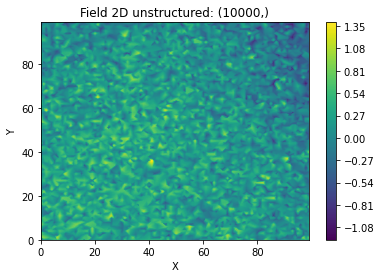

In [32]:
params = {
    "var": 2,
    "nu": 2,
    "len_scale": 14,
    "nugget": 0.1
}

x = np.random.randint(0, 100, size=10000)
y = np.random.randint(0, 100, size=10000)
model = Matern(dim=2, **params)
srf = gs.SRF(model, seed=19970221)
field = srf((x, y))

srf.vtk_export("field")
srf.plot();

In [29]:
bins = np.arange(40)
bin_center, gamma = gs.vario_estimate_unstructured((x, y), field, bins, estimator="cressie")

In [30]:
fit_model = Matern(dim=2)
# fit_model.set_arg_bounds(nu=[0.2, 20])
fit_model.fit_variogram(bin_center, gamma)

({'var': 2.2078491673668172,
  'len_scale': 15.066469456596048,
  'nugget': 0.08608023297679081,
  'nu': 1.6322322386631727},
 array([[ 1.83830586e-03,  1.85068027e-02, -1.73598478e-04,
         -5.31393554e-03],
        [ 1.85068027e-02,  1.92661272e-01, -1.45091212e-03,
         -5.43129771e-02],
        [-1.73598478e-04, -1.45091212e-03,  4.70065118e-05,
          6.16256878e-04],
        [-5.31393554e-03, -5.43129771e-02,  6.16256878e-04,
          1.72994609e-02]]))

Matern(dim=2, var=2.2078491673668172, len_scale=15.066469456596048, nugget=0.08608023297679081, anis=[1.], angles=[0.], nu=1.6322322386631727)


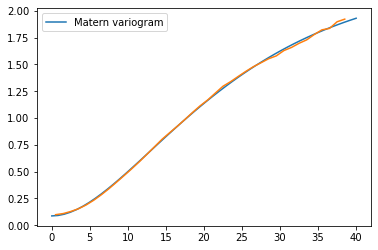

In [31]:
ax = fit_model.plot(x_max=40)
ax.plot(bin_center, gamma)
print(fit_model)